In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random


In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = x_train/255
x_test = x_test/255

print(x_train.shape)

(60000, 28, 28)


In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7275 - loss: 1.0308 - val_accuracy: 0.9015 - val_loss: 0.3625
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9012 - loss: 0.3547 - val_accuracy: 0.9178 - val_loss: 0.2959
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9166 - loss: 0.2996 - val_accuracy: 0.9261 - val_loss: 0.2622
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9268 - loss: 0.2610 - val_accuracy: 0.9337 - val_loss: 0.2353
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9347 - loss: 0.2369 - val_accuracy: 0.9380 - val_loss: 0.2171
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9392 - loss: 0.2184 - val_accuracy: 0.9412 - val_loss: 0.2026
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9451 - loss: 0.1996 - val_accuracy: 0.9446 - val_loss: 0.1889
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9482 - loss: 0.1857 - 

In [ ]:
test_loss, test_accu = model.evaluate(x_test, y_test)
print(test_loss)
print(test_accu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9456 - loss: 0.1870
0.16072025895118713
0.953499972820282


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


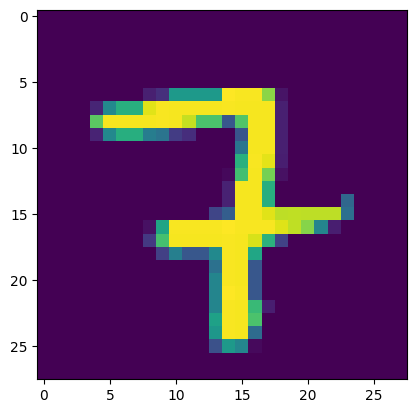

7


In [ ]:
import numpy as np
n = random.randint(0,9999)
predicted_value = model.predict(x_test)
plt.imshow(x_test[n])
plt.show()
print(np.argmax(predicted_value[n]))

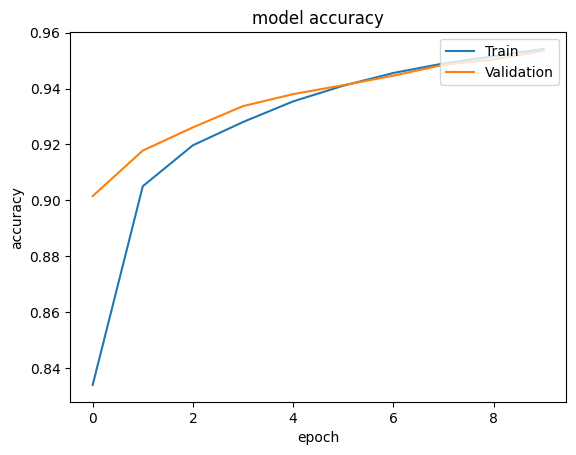

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel("epoch")
plt.legend(["Train","Validation"], loc='upper right')
plt.show()

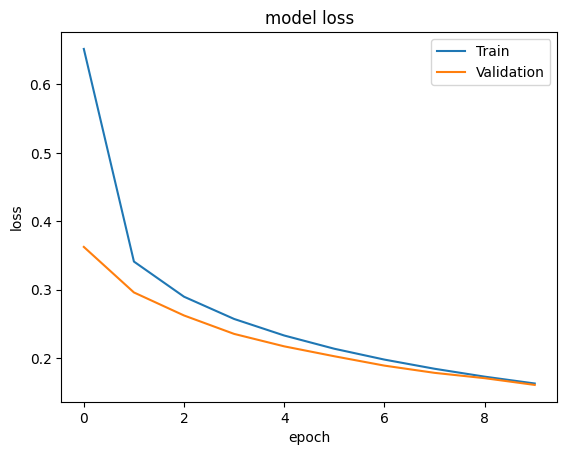

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel("epoch")
plt.legend(["Train","Validation"], loc='upper right')
plt.show()